In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csvpath = "../csv/Social_Network_Ads_1.csv"

In [3]:
dataset = pd.read_csv(csvpath)

In [4]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.0,0
1,15810944,01-04-2012,Italy,Male,35,20000.0,0
2,15668575,01-05-2012,France,Female,26,43000.0,0
3,15603246,01-06-2012,Germany,Female,27,57000.0,0
4,15804002,01-09-2012,France,Male,19,76000.0,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.0,1
399,15706071,08-06-2013,Italy,Male,51,23000.0,1
400,15654296,08-07-2013,Italy,Female,50,20000.0,1
401,15755018,08-08-2013,Germany,Male,36,33000.0,0


In [5]:
dataset = dataset[["Age", "EstimatedSalary", "Purchased"]]


In [6]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000.0,0
1,35,20000.0,0
2,26,43000.0,0
3,27,57000.0,0
4,19,76000.0,0
...,...,...,...
398,46,41000.0,1
399,51,23000.0,1
400,50,20000.0,1
401,36,33000.0,0


In [7]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,4.010000e+02,403.000000
mean,37.692308,8.236658e+04,0.359801
std,10.475730,2.486716e+05,0.480539
min,18.000000,1.500000e+04,0.000000
25%,30.000000,4.300000e+04,0.000000
50%,37.000000,7.000000e+04,0.000000
75%,46.000000,8.800000e+04,1.000000
max,60.000000,5.000000e+06,1.000000


In [8]:
dataset.fillna(dataset.mean(), inplace = True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_2600\836043679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.fillna(dataset.mean(), inplace = True)


<Axes: >

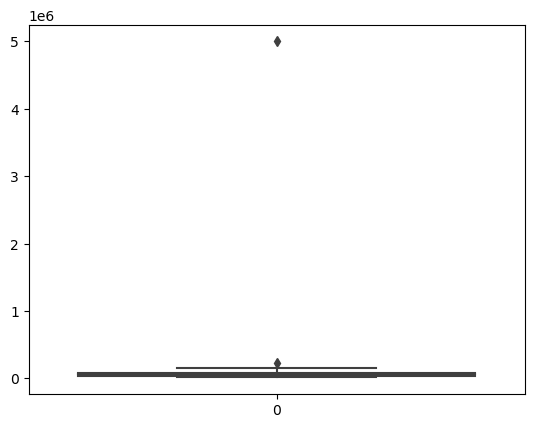

In [9]:
sns.boxplot(dataset["EstimatedSalary"])

In [10]:
q1 = dataset["EstimatedSalary"].quantile(q= 0.25)

In [11]:
q3 = dataset["EstimatedSalary"].quantile(q= 0.75)

In [12]:
q3

88000.0

In [13]:
iqr = q3 - q1

In [14]:
iqr

45000.0

In [15]:
lower_boundary = q1 -(1.5*iqr)

In [16]:
upper_boundary = q3 +(1.5*iqr)

In [17]:
dataset[dataset["EstimatedSalary"] > upper_boundary]

,Age,EstimatedSalary,Purchased
161,36,5000000.0,1
281,54,233000.0,1


In [18]:
dataset[(dataset["EstimatedSalary"] < lower_boundary) | (dataset["EstimatedSalary"] > upper_boundary)]

,Age,EstimatedSalary,Purchased
161,36,5000000.0,1
281,54,233000.0,1


In [19]:
outliers = dataset[(dataset["EstimatedSalary"] < lower_boundary) | (dataset["EstimatedSalary"] > upper_boundary)]

Drop outliers

In [20]:
(len(outliers) / len(dataset)) * 100

0.49627791563275436

In [21]:
outliers.index

Int64Index([161, 281], dtype='int64')

In [22]:
dataset.drop(outliers.index, axis = 0, inplace = True)

C:\Users\sandh\AppData\Local\Temp\ipykernel_2600\4230092035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers.index, axis = 0, inplace = True)


In [23]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000.0,0
1,35,20000.0,0
2,26,43000.0,0
3,27,57000.0,0
4,19,76000.0,0
...,...,...,...
398,46,41000.0,1
399,51,23000.0,1
400,50,20000.0,1
401,36,33000.0,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

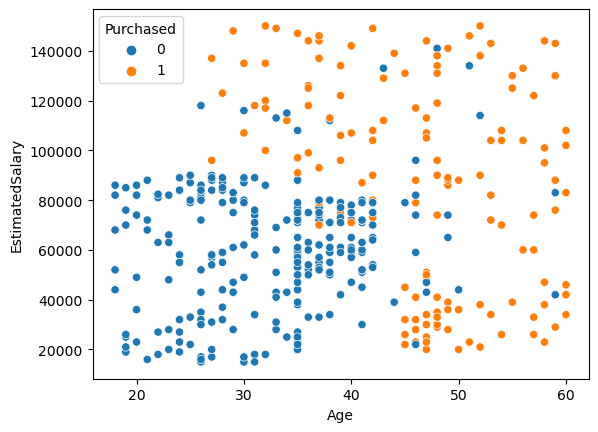

In [24]:
sns.scatterplot(x = dataset["Age"], y= dataset["EstimatedSalary"], hue = dataset["Purchased"])

Split data into Independent & Dependent Variables

In [25]:
X = dataset.drop("Purchased", axis = 1) # Independent Variable

In [26]:
X

,Age,EstimatedSalary
0,19,19000.0
1,35,20000.0
2,26,43000.0
3,27,57000.0
4,19,76000.0
...,...,...
398,46,41000.0
399,51,23000.0
400,50,20000.0
401,36,33000.0


In [27]:
y = dataset["Purchased"] # dependent Variable

In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
398    1
399    1
400    1
401    0
402    1
Name: Purchased, Length: 401, dtype: int64

Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 35)

In [31]:
X_train

,Age,EstimatedSalary
106,26,35000.0
133,21,68000.0
127,26,32000.0
87,28,85000.0
103,33,149000.0
...,...,...
233,39,42000.0
250,41,52000.0
33,28,44000.0
272,43,133000.0


Building The model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
#n_estimators -- no of decision trees

rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [34]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Prediction /Testing

In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

    Evaluation

In [37]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [38]:
y_test =  y_test.astype("float")

In [39]:
y_test

157    0.0
80     0.0
118    0.0
10     0.0
72     0.0
      ... 
382    1.0
264    1.0
244    1.0
231    1.0
188    0.0
Name: Purchased, Length: 81, dtype: float64

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
test_score = accuracy_score(y_test, y_pred)

In [42]:
test_score

0.8765432098765432

In [43]:
test_score *100

87.65432098765432

In [44]:
#the above score indicates that approx 84% of the prediction are correct

In [45]:
y_pred_train = rf_model.predict(X_train)

In [46]:
y_pred_train

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [47]:
train_score = accuracy_score(y_train, y_pred_train)

In [48]:
train_score

0.984375

In [49]:
import mlxtend

In [50]:
mlxtend.__version__

'0.22.0'

In [51]:
#!pip install mlxtend == 0.22.0

In [52]:
from mlxtend.plotting import plot_decision_regions

In [53]:
 dt =X_train.values

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Salary')

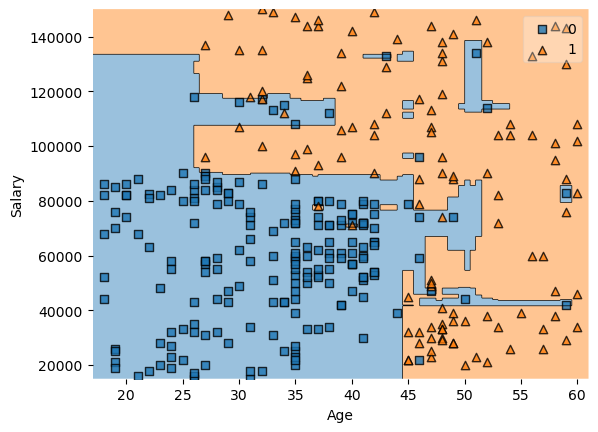

In [54]:
plot_decision_regions(X_train.values, y_train.astype("int").values, clf = rf_model)
plt.xlabel("Age")
plt.ylabel("Salary")

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Salary')

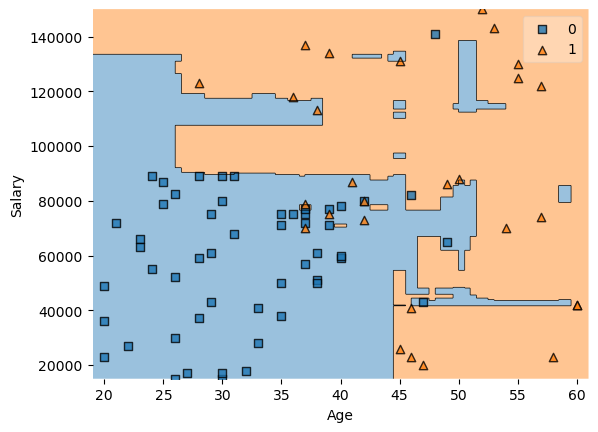

In [55]:
plot_decision_regions(X_test.values, y_test.astype("int").values, clf = rf_model)
plt.xlabel("Age")
plt.ylabel("Salary")

In [56]:
rf_model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1650222118),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=169146606),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1994142414),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1999500672),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=368235977),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1313732059),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1401259517),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=939869698),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
         

In [57]:
rf_model.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=1650222118)

Plot Decision Tree

In [58]:
from sklearn.tree import plot_tree

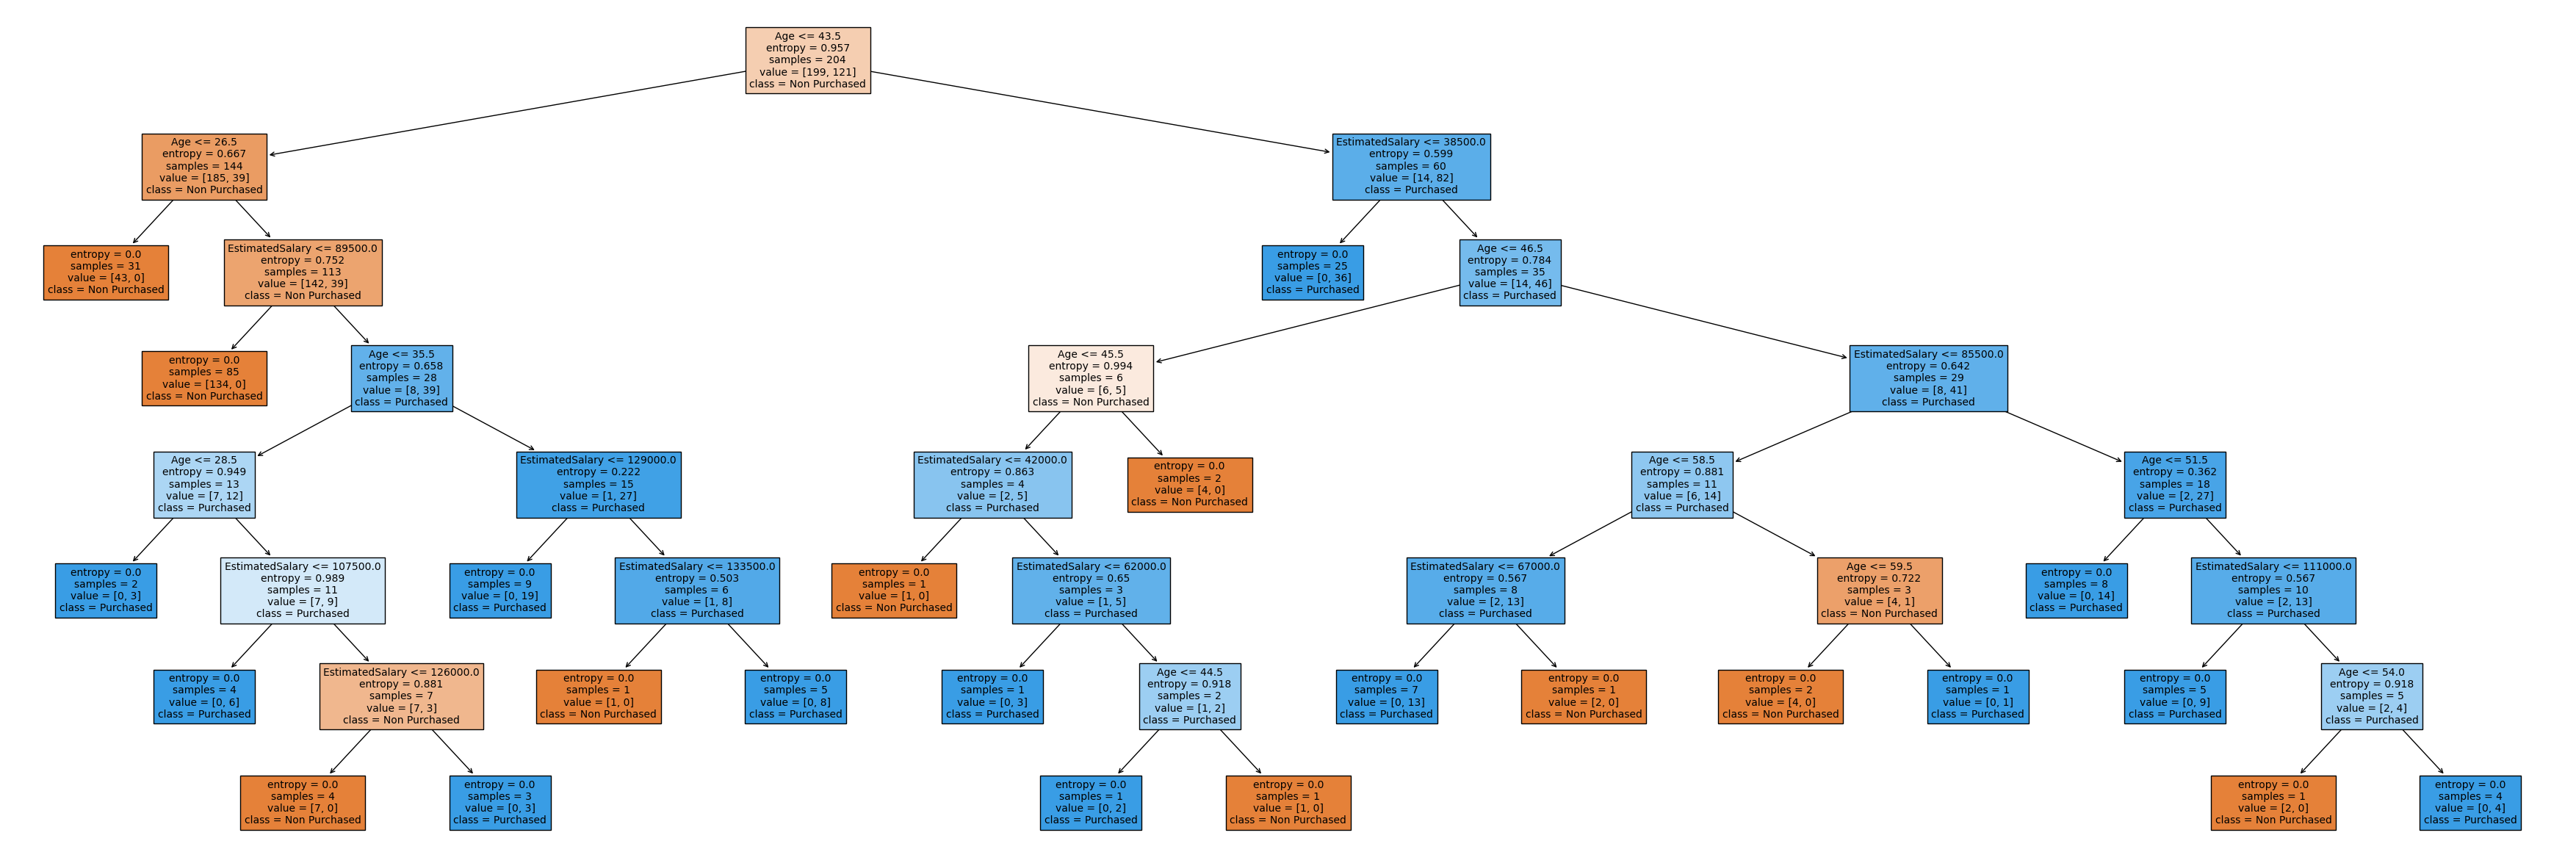

In [59]:
plt.figure(figsize = (45, 15))
plot_tree(rf_model.estimators_[0], filled = True, fontsize=10, feature_names = X_train.columns, class_names = ["Non Purchased", "Purchased"])
plt.show()


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm_test = confusion_matrix(y_test, y_pred)

In [62]:
cm_test

array([[50,  3],
       [ 7, 21]], dtype=int64)

In [63]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

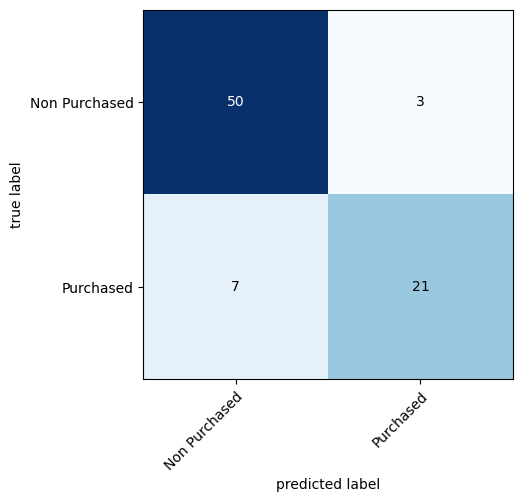

In [64]:
plot_confusion_matrix(cm_test, class_names = ["Non Purchased", "Purchased"])

Real Time Prediction

In [65]:
X.head(1)

,Age,EstimatedSalary
0,19,19000.0


In [66]:
data = [[25, 60000]]

In [67]:
data = np.array(data)

In [68]:
data

array([[   25, 60000]])

In [69]:
for idx, each_dt in enumerate(rf_model.estimators_):
    print(f"Decision Tree {idx}", each_dt.predict(data))

Decision Tree 0 [0.]
Decision Tree 1 [0.]
Decision Tree 2 [0.]
Decision Tree 3 [0.]
Decision Tree 4 [0.]
Decision Tree 5 [0.]
Decision Tree 6 [0.]
Decision Tree 7 [0.]
Decision Tree 8 [0.]
Decision Tree 9 [0.]


In [70]:
rf_model.predict(data)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Save The Model